# Customer Segmentation using K-Nearest Neighbors
## Written by Abiola Obembe
### Date : 14th March 2020



#### In this project using demongraphic information of existing customers in the database of  a telecommuinication company, I segmented the target field (custat) into four possile fieldsvalues as follows
#### 1. Basic service
#### 2. E service
#### 3. Plus service
#### 4. Total service

#### Aim: To build a classifier that takes uses as input the demographic information of customers and predicts the class of the unknown case 

In [4]:
# install required libraries

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np
import itertools
print("libraries installed")

libraries installed


In [5]:
# download and explore dataset

!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
    
df = pd.read_csv("teleCust1000t.csv")

df.head(10)

--2020-03-15 01:14:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

100%[======================================>] 37,048      --.-K/s   in 0.002s  

2020-03-15 01:14:02 (17.3 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [9]:
# Examine dataframe
print(" The dataframe has:", df.shape[0] , 'rows and has',  df.shape[1], 'features' )

print (df.columns)

 The dataframe has: 1000 rows and has 12 features
Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


In [67]:
# Drop rows with Nan
df.dropna(axis=0, how='any')

print(" The new dataframe has:", df.shape[0] , 'rows and has',  df.shape[1], 'features' )

print (df.columns)

 The new dataframe has: 1000 rows and has 12 features
Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


In [11]:
# Explorataory analysis of dataframe
# display unique categories in the target field
print(df['custcat'].unique())

# How many counts for each category class

print(df['custcat'].value_counts())

[1 4 3 2]
3    281
1    266
4    236
2    217
Name: custcat, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd54a90a048>]],
      dtype=object)

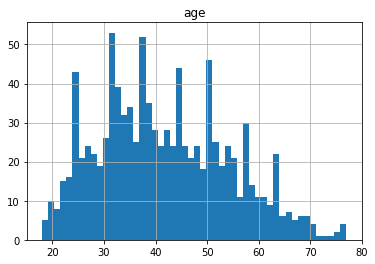

In [12]:
# Explore dataframe by visualization

# Plot distribution of age 
df.hist(column = 'age' , bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd54a55ef28>]],
      dtype=object)

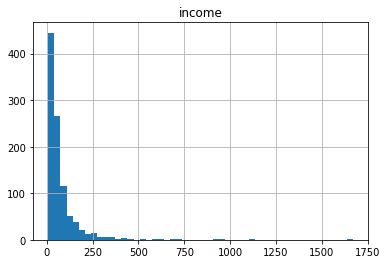

In [13]:
# # Plot distribution of income
df.hist(column= 'income' , bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd54a4b0a58>]],
      dtype=object)

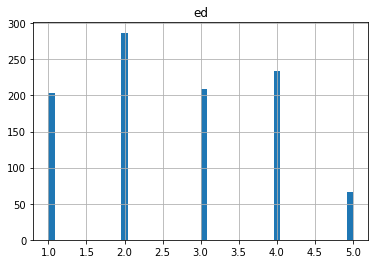

In [14]:
# # Plot distribution of education
df.hist(column= 'ed' , bins = 50)

In [29]:
# Convert dataframe to numpy array to use sklearn

# Define feature X
X = df [['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]. values. astype(float)

# Define labels y
y = df['custcat'].values

# Display subset  X
X[0:3]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.]])

In [30]:
# Normalize data
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#print( scaler.fit(X))
#print(scaler.transform(X.astype(float)))
X = StandardScaler().fit(X).transform(X.astype(float))
X[0:3]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004]])

In [58]:
# Split X and y to train_test set using 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

print('Train set:' , X_train.shape , y_train.shape)
print('Test set:' , X_test.shape , y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [60]:
# Import and adopt KNN for  K = 5 and train the classifier
K = 5
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = K)
neigh.fit(X_train, y_train)

# predict
yhat = neigh.predict(X_test)

yhat_proba = neigh.predict_proba(X_test)

print (yhat_proba[0:3])

[[0.4 0.  0.4 0.2]
 [0.4 0.  0.6 0. ]
 [0.2 0.2 0.6 0. ]]


In [61]:
# Accuracy Evaluation using accuracy_score i.e. Jaccard similarity index

from sklearn.metrics import accuracy_score
print("Train set Jaccard similarity index is: %.2f" % accuracy_score(y_train, neigh.predict(X_train)) )
print("Test set Jaccard similarity index is: %.2f" % accuracy_score(y_test, yhat ))


Train set Jaccard similarity index is: 0.54
Test set Jaccard similarity index is: 0.32


In [62]:
# Accuracy Evaluation using F1 score i.e. Confusion matrix

from sklearn.metrics import classification_report

# Train set report
yhat_train = neigh.predict(X_train)

print('Train set Confusion Report :')
print( classification_report(y_train, yhat_train, labels=[1, 2, 3, 4]))


# Test set report
print('Test set Confusion Report :')
print( classification_report(y_test, yhat, labels=[1, 2, 3, 4]))

Train set Confusion Report :
              precision    recall  f1-score   support

           1       0.52      0.68      0.59       215
           2       0.52      0.52      0.52       173
           3       0.56      0.56      0.56       227
           4       0.55      0.37      0.44       185

   micro avg       0.54      0.54      0.54       800
   macro avg       0.54      0.53      0.53       800
weighted avg       0.54      0.54      0.53       800

Test set Confusion Report :
              precision    recall  f1-score   support

           1       0.33      0.47      0.39        51
           2       0.29      0.36      0.32        44
           3       0.29      0.26      0.27        54
           4       0.36      0.18      0.24        51

   micro avg       0.32      0.32      0.32       200
   macro avg       0.32      0.32      0.31       200
weighted avg       0.32      0.32      0.31       200



In [63]:
# Determining the best vale for K
Ks = 10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))
ConfustionMx = []

for n in range(1,Ks):
    neigh    = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat     = neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test,yhat)
    std_acc[n-1]  = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

# print the K that gives best accuracy
print("The best accuracy was with", mean_acc.max(), "with K = ", mean_acc.argmax()+1)



The best accuracy was with 0.34 with K =  9


/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/

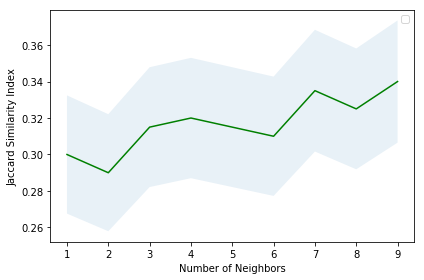

In [64]:
# Plot model accuracy fopr different values of K

plt.plot(range(1,Ks), mean_acc , 'g')
plt.fill_between(range(1,Ks),mean_acc -1 *std_acc, mean_acc +1 *std_acc , alpha = 0.10)
plt.legend('Accuracy', '+- 3*std')
plt.ylabel('Jaccard Similarity Index')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()